In [1]:
import cv2
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

para_dir = Path("/Users/tom1484/Git/Parallel-Programming-2025/hw2/results/tmp/")
sequ_dir = Path("/Users/tom1484/Git/sequential/hw2/results/tmp/")

In [2]:
para_images = []
for octave_id in range(8):
    images = []
    for img_id in range(8):
        img_path = para_dir / f"{octave_id}_{img_id}.png"
        if img_path.exists():
            images.append(cv2.imread(str(img_path)))
    
    para_images.append(images)

In [3]:
sequ_images = []
for octave_id in range(8):
    images = []
    for img_id in range(8):
        img_path = sequ_dir / f"{octave_id}_{img_id}.png"
        if img_path.exists():
            images.append(cv2.imread(str(img_path)))

    sequ_images.append(images)

In [4]:
para_images[0][0].shape, sequ_images[0][0].shape

((964, 1248, 3), (964, 1248, 3))

In [5]:
N_OCTAVES = 8
N_IMAGES = 8

diffs = []
for octave_id in range(N_OCTAVES):
    octave_diffs = []
    for img_id in range(N_IMAGES):
        diff = cv2.absdiff(para_images[octave_id][img_id], sequ_images[octave_id][img_id])
        octave_diffs.append(diff)
    diffs.append(octave_diffs)

for octave_id in range(N_OCTAVES):
    for img_id in range(N_IMAGES):
        if diffs[octave_id][img_id].sum() > 0:
            print(f"Octave {octave_id}, Image {img_id} differs: diff = {diffs[octave_id][img_id].sum()}")

Octave 0, Image 0 differs: diff = 9
Octave 0, Image 1 differs: diff = 18
Octave 0, Image 2 differs: diff = 12
Octave 0, Image 3 differs: diff = 33
Octave 0, Image 4 differs: diff = 30
Octave 0, Image 5 differs: diff = 18
Octave 0, Image 6 differs: diff = 21
Octave 0, Image 7 differs: diff = 12
Octave 1, Image 0 differs: diff = 6
Octave 1, Image 3 differs: diff = 6
Octave 1, Image 4 differs: diff = 3
Octave 1, Image 5 differs: diff = 3
Octave 1, Image 7 differs: diff = 9
Octave 2, Image 7 differs: diff = 3
Octave 3, Image 5 differs: diff = 3
Octave 3, Image 6 differs: diff = 3
Octave 7, Image 3 differs: diff = 6
Octave 7, Image 4 differs: diff = 6
Octave 7, Image 5 differs: diff = 87
Octave 7, Image 6 differs: diff = 159
Octave 7, Image 7 differs: diff = 447


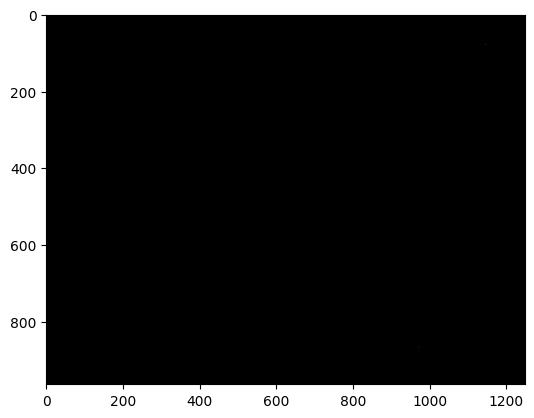

In [6]:
diff = diffs[0][0].astype(np.float32)
plt.imshow(diff / diff.max())
plt.show()